In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import tensorflow as tf
import tensorflow.keras as keras
import pandas as pd
import numpy as np
import nltk
from sklearn.metrics import classification_report

In [ ]:
#Upload input file from local to google colab
from google.colab import files
uploaded = files.upload()

Saving is_journals.xlsx to is_journals.xlsx


In [ ]:
#Read in the journal dataset
journal = pd.read_excel("is_journals.xlsx")
journal.head()

,TI,AB,SO,PY,Class,Text
0,The Role of Business Intelligence and Communic...,This study examines the role that business int...,JOURNAL OF THE ASSOCIATION FOR INFORMATION SYS...,2017,1,The Role of Business Intelligence and Communic...
1,"OPERATIONAL IT FAILURES, IT VALUE DESTRUCTION,...",This paper presents an empirical study of chan...,MIS QUARTERLY,2017,1,"OPERATIONAL IT FAILURES, IT VALUE DESTRUCTION,..."
2,ON THE ROLE OF FAIRNESS AND SOCIAL DISTANCE IN...,Online referral systems help firms attract new...,MIS QUARTERLY,2017,1,ON THE ROLE OF FAIRNESS AND SOCIAL DISTANCE IN...
3,KNOWLEDGE MANAGEMENT SYSTEM USE AND JOB PERFOR...,This paper seeks to develop a better understan...,MIS QUARTERLY,2017,1,KNOWLEDGE MANAGEMENT SYSTEM USE AND JOB PERFOR...
4,REPEATED INTERACTIONS VERSUS SOCIAL TIES: QUAN...,The growing importance of online social networ...,MIS QUARTERLY,2017,1,REPEATED INTERACTIONS VERSUS SOCIAL TIES: QUAN...


We will keep the columns that are relevant. i.e. AB, which provides the exctract for the journal and Class, which is either 0 if it was published in an Eupopean journal and 1 if it was published in an American journal.

In [ ]:
#Drop all other columns except AB and Class
journal.drop('TI',axis=1,inplace=True)
journal.drop('SO',axis=1,inplace=True)
journal.drop('PY',axis=1,inplace=True)
journal.drop('Text',axis=1,inplace=True)
journal.head()

,AB,Class
0,This study examines the role that business int...,1
1,This paper presents an empirical study of chan...,1
2,Online referral systems help firms attract new...,1
3,This paper seeks to develop a better understan...,1
4,The growing importance of online social networ...,1


In [ ]:
journal.shape

(7706, 2)

In [ ]:
#Check one of the abstract
journal.iloc[1][0]

'This paper presents an empirical study of changes that firms implement in their board-level IT governance (ITG) upon experiencing operational IT failures. Consistent with the separation of oversight from management decisions, board-level ITG is responsible for monitoring managerial IT decisions and policies for controlling IT resources. We expect that operational IT failures indicating inadequacies in board monitoring of controls over IT resources would result in a negative stock market reaction and, in turn, induce firms to improve their board-level ITG. Our expectation is confirmed based on a sample of 110 operational IT failures from U.S. public financial firms. Specifically, our results demonstrate that subsequent to experiencing operational IT failures, firms make improvements to the IT competency level of their boards, and the improvements are proportional to the degree of negative market reaction. However, those improvements are only on the executive side of the board, namely: 

In [ ]:
# Convert text to lowercase
journal['AB'] = journal['AB'].apply(lambda x: str(x).lower())
journal.head()

,AB,Class
0,this study examines the role that business int...,1
1,this paper presents an empirical study of chan...,1
2,online referral systems help firms attract new...,1
3,this paper seeks to develop a better understan...,1
4,the growing importance of online social networ...,1


Text Normalization

In [ ]:
#Text Tokenization
from nltk.tokenize.toktok import ToktokTokenizer
tokenizer=ToktokTokenizer()
#Setting English stopwords
from nltk.corpus import stopwords
nltk.download('stopwords')
stopword_list=nltk.corpus.stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Expand Contractions

In [ ]:
!pip install contractions

     |████████████████████████████████| 321 kB 4.8 MB/s 
     |████████████████████████████████| 284 kB 42.2 MB/s 
  Created wheel for pyahocorasick: filename=pyahocorasick-1.4.2-cp37-cp37m-linux_x86_64.whl size=85451 sha256=d12a1801d259fe557dbaa65917267dd642ab131a7060554d583f71130f305592
  Stored in directory: /root/.cache/pip/wheels/25/19/a6/8f363d9939162782bb8439d886469756271abc01f76fbd790f
Successfully built pyahocorasick


In [ ]:
import contractions
#contractions expansion
journal['AB'] = journal['AB'].apply(lambda x: contractions.fix(x))

Remove Special Characters

In [ ]:
# Removing special characters in string
# Using regex
import re
def RemoveSpecialCharacters(text):
    
    text = re.sub(r'[^\w ]+', "", text)
    text = ' '.join(text.split())
    return text

In [ ]:
journal['AB'] = journal['AB'].apply(lambda x: RemoveSpecialCharacters(x))

In [ ]:
#Check one of the abstract
journal.iloc[1][0]

'this paper presents an empirical study of changes that firms implement in their boardlevel it governance itg upon experiencing operational it failures consistent with the separation of oversight from management decisions boardlevel itg is responsible for monitoring managerial it decisions and policies for controlling it resources we expect that operational it failures indicating inadequacies in board monitoring of controls over it resources would result in a negative stock market reaction and in turn induce firms to improve their boardlevel itg our expectation is confirmed based on a sample of 110 operational it failures from yous public financial firms specifically our results demonstrate that subsequent to experiencing operational it failures firms make improvements to the it competency level of their boards and the improvements are proportional to the degree of negative market reaction however those improvements are only on the executive side of the board namely an increase in the 

Remove stop words

In [ ]:
def RemoveStopWords(text):
    return ' '.join([word for word in text.split() if word not in stopword_list])

In [ ]:

journal['AB'] = journal['AB'].apply(lambda x: RemoveStopWords(x))
journal.iloc[1][0]

'paper presents empirical study changes firms implement boardlevel governance itg upon experiencing operational failures consistent separation oversight management decisions boardlevel itg responsible monitoring managerial decisions policies controlling resources expect operational failures indicating inadequacies board monitoring controls resources would result negative stock market reaction turn induce firms improve boardlevel itg expectation confirmed based sample 110 operational failures yous public financial firms specifically results demonstrate subsequent experiencing operational failures firms make improvements competency level boards improvements proportional degree negative market reaction however improvements executive side board namely increase experience internal executive directors increased turnover rate cios serving board furthermore likelihood cio turnover lower itintensive firms turnover could disruptive results contribute understanding critical connection operational

Remove Punctuations

In [ ]:
# Removing punctuations in string
# Using regex
def RemovePunctuations(text):
    text = re.sub(r'[^\w\s]', '', text)
    text = ' '.join(text.split())
    return text



In [ ]:
journal['AB'] = journal['AB'].apply(lambda x: RemovePunctuations(x))
journal.iloc[1][0]

'paper presents empirical study changes firms implement boardlevel governance itg upon experiencing operational failures consistent separation oversight management decisions boardlevel itg responsible monitoring managerial decisions policies controlling resources expect operational failures indicating inadequacies board monitoring controls resources would result negative stock market reaction turn induce firms improve boardlevel itg expectation confirmed based sample 110 operational failures yous public financial firms specifically results demonstrate subsequent experiencing operational failures firms make improvements competency level boards improvements proportional degree negative market reaction however improvements executive side board namely increase experience internal executive directors increased turnover rate cios serving board furthermore likelihood cio turnover lower itintensive firms turnover could disruptive results contribute understanding critical connection operational

Tokenize the abstract

In [ ]:
journal['AB'] = journal['AB'].apply(lambda x: tokenizer.tokenize(x))
journal.iloc[1][0]

['paper',
 'presents',
 'empirical',
 'study',
 'changes',
 'firms',
 'implement',
 'boardlevel',
 'governance',
 'itg',
 'upon',
 'experiencing',
 'operational',
 'failures',
 'consistent',
 'separation',
 'oversight',
 'management',
 'decisions',
 'boardlevel',
 'itg',
 'responsible',
 'monitoring',
 'managerial',
 'decisions',
 'policies',
 'controlling',
 'resources',
 'expect',
 'operational',
 'failures',
 'indicating',
 'inadequacies',
 'board',
 'monitoring',
 'controls',
 'resources',
 'would',
 'result',
 'negative',
 'stock',
 'market',
 'reaction',
 'turn',
 'induce',
 'firms',
 'improve',
 'boardlevel',
 'itg',
 'expectation',
 'confirmed',
 'based',
 'sample',
 '110',
 'operational',
 'failures',
 'yous',
 'public',
 'financial',
 'firms',
 'specifically',
 'results',
 'demonstrate',
 'subsequent',
 'experiencing',
 'operational',
 'failures',
 'firms',
 'make',
 'improvements',
 'competency',
 'level',
 'boards',
 'improvements',
 'proportional',
 'degree',
 'negative',


Lemmatization

In [ ]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()

def lemmatize_text(text):
    return [lemmatizer.lemmatize(word) for word in text]


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [ ]:
journal['AB'] = journal['AB'].apply(lambda x: lemmatize_text(x))

Stemming

In [ ]:

from nltk.stem import PorterStemmer 
stemmer = PorterStemmer()

def stem_text(text):
    stemmed_text = [stemmer.stem(word) for word in text]
    return " ".join(stemmed_text) 

In [ ]:
journal['AB'] = journal['AB'].apply(lambda x: stem_text(x))
journal.iloc[1][0]

'paper present empir studi chang firm implement boardlevel govern itg upon experienc oper failur consist separ oversight manag decis boardlevel itg respons monitor manageri decis polici control resourc expect oper failur indic inadequaci board monitor control resourc would result neg stock market reaction turn induc firm improv boardlevel itg expect confirm base sampl 110 oper failur you public financi firm specif result demonstr subsequ experienc oper failur firm make improv compet level board improv proport degre neg market reaction howev improv execut side board name increas experi intern execut director increas turnov rate cio serv board furthermor likelihood cio turnov lower itintens firm turnov could disrupt result contribut understand critic connect oper failur boardlevel itg'

Vectorize

In [ ]:
X = journal['AB']
y = journal['Class']

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=5000, ngram_range=(1,3))
X = tfidf.fit_transform(X).toarray()

Split data for Train and Test

In [ ]:
#Split data into test and train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 4, stratify = y)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(6164, 5000) (6164,)
(1542, 5000) (1542,)


#Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
lr_y_test_pred = lr_model.predict(X_test)


Evaluate the model

In [ ]:
print(classification_report(y_test, lr_y_test_pred))

              precision    recall  f1-score   support

           0       0.90      0.88      0.89       971
           1       0.80      0.83      0.82       571

    accuracy                           0.86      1542
   macro avg       0.85      0.86      0.85      1542
weighted avg       0.86      0.86      0.86      1542



#Random Forest

In [ ]:

from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=20,random_state=42)
rf_model.fit(X_train, y_train)
rf_y_test_pred = rf_model.predict(X_test)


Evaluate the model

In [ ]:
print(classification_report(y_test, rf_y_test_pred))

              precision    recall  f1-score   support

           0       0.92      0.85      0.89       971
           1       0.78      0.88      0.83       571

    accuracy                           0.86      1542
   macro avg       0.85      0.87      0.86      1542
weighted avg       0.87      0.86      0.87      1542



#XGBoost

In [ ]:
        import xgboost as xgb
        xg_model = xgb.XGBClassifier(max_depth = 8, eta = 0.7, objective= 'binary:logistic', n_estimators = 200, 
                                  use_label_encoder=False, eval_metric = 'auc')
        xg_model.fit(X_train, y_train)
        xg_y_test_pred = xg_model.predict(X_test)
        

Evaluate the model

In [ ]:
print(classification_report(y_test, xg_y_test_pred))

              precision    recall  f1-score   support

           0       0.95      0.84      0.89       971
           1       0.78      0.92      0.84       571

    accuracy                           0.87      1542
   macro avg       0.86      0.88      0.87      1542
weighted avg       0.88      0.87      0.87      1542



*Out of all the ML models we can see that the XGBoost provides the best performace i.e. highest accuracy as well as the F1 Score.*

Deep Learning Model

In [ ]:
#Setting up the packages to build our models
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
  input_shape = X_train.shape[1]
  single_layer_model= Sequential()
  single_layer_model.add(Dense(64, activation="swish",input_shape = [input_shape,]))
  single_layer_model.add(Dense(1, activation="sigmoid"))
  opt = keras.optimizers.Adam(learning_rate=0.0001)
  single_layer_model.compile(optimizer= opt, loss='binary_crossentropy', metrics = ['accuracy'])
  history_singleLayer= single_layer_model.fit(X_train,y_train,validation_split=0.1, epochs=500, batch_size=32,
                                            callbacks=[keras.callbacks.EarlyStopping(patience=10)],verbose=1)

Epoch 1/500
174/174 [==============================] - 2s 6ms/step - loss: 0.6748 - accuracy: 0.6333 - val_loss: 0.6619 - val_accuracy: 0.6143
Epoch 2/500
174/174 [==============================] - 1s 5ms/step - loss: 0.6425 - accuracy: 0.6313 - val_loss: 0.6370 - val_accuracy: 0.6143
Epoch 3/500
174/174 [==============================] - 1s 5ms/step - loss: 0.6158 - accuracy: 0.6313 - val_loss: 0.6157 - val_accuracy: 0.6143
Epoch 4/500
174/174 [==============================] - 1s 5ms/step - loss: 0.5907 - accuracy: 0.6313 - val_loss: 0.5933 - val_accuracy: 0.6143
Epoch 5/500
174/174 [==============================] - 1s 5ms/step - loss: 0.5644 - accuracy: 0.6375 - val_loss: 0.5691 - val_accuracy: 0.6337
Epoch 6/500
174/174 [==============================] - 1s 5ms/step - loss: 0.5363 - accuracy: 0.6773 - val_loss: 0.5427 - val_accuracy: 0.6823
Epoch 7/500
174/174 [==============================] - 1s 5ms/step - loss: 0.5070 - accuracy: 0.7447 - val_loss: 0.5160 - val_accuracy: 0.7310

Evaluate the model

In [ ]:
best_score = max(history_singleLayer.history['val_accuracy'])

print(best_score)

0.8752025961875916


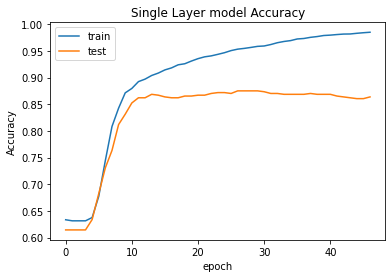

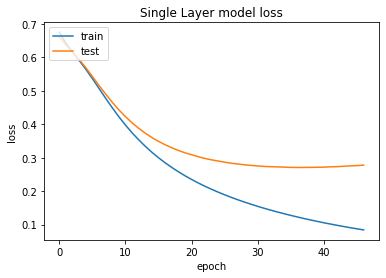

In [ ]:
#Plot the learning curve
import matplotlib.pyplot as plt
# summarize history for accuracy
plt.plot(history_singleLayer.history['accuracy'])
plt.plot(history_singleLayer.history['val_accuracy'])
plt.title('Single Layer model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history_singleLayer.history['loss'])
plt.plot(history_singleLayer.history['val_loss'])
plt.title('Single Layer model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

*Using a single hidden layer Deep Learning network we are already getting 0.87 accuracy which is similar to the results we got using XGBoost. However we can look at the graph above and see that our model is overfitting. We are going to use dropout to counter overfitting and evaluate our model again.*

In [ ]:
  from keras.layers import Dropout
  input_shape = X_train.shape[1]
  single_layer_model_withDropout= Sequential()
  single_layer_model_withDropout.add(Dense(64, activation="swish",input_shape = [input_shape,]))
  single_layer_model_withDropout.add(Dropout(0.5))
  single_layer_model_withDropout.add(Dense(1, activation="sigmoid"))
  opt = keras.optimizers.Adam(learning_rate=0.0001)
  single_layer_model_withDropout.compile(optimizer= opt, loss='binary_crossentropy', metrics = ['accuracy'])
  history_singleLayer_withDropout= single_layer_model_withDropout.fit(X_train,y_train,validation_split=0.1, epochs=500, batch_size=32,
                                            callbacks=[keras.callbacks.EarlyStopping(patience=10)],verbose=1)

Epoch 1/500
174/174 [==============================] - 1s 6ms/step - loss: 0.6929 - accuracy: 0.5028 - val_loss: 0.6910 - val_accuracy: 0.5997
Epoch 2/500
174/174 [==============================] - 1s 5ms/step - loss: 0.6890 - accuracy: 0.6144 - val_loss: 0.6877 - val_accuracy: 0.6224
Epoch 3/500
174/174 [==============================] - 1s 6ms/step - loss: 0.6850 - accuracy: 0.6342 - val_loss: 0.6845 - val_accuracy: 0.6143
Epoch 4/500
174/174 [==============================] - 1s 6ms/step - loss: 0.6817 - accuracy: 0.6330 - val_loss: 0.6814 - val_accuracy: 0.6143
Epoch 5/500
174/174 [==============================] - 1s 5ms/step - loss: 0.6783 - accuracy: 0.6322 - val_loss: 0.6785 - val_accuracy: 0.6143
Epoch 6/500
174/174 [==============================] - 1s 6ms/step - loss: 0.6749 - accuracy: 0.6313 - val_loss: 0.6755 - val_accuracy: 0.6143
Epoch 7/500
174/174 [==============================] - 1s 6ms/step - loss: 0.6714 - accuracy: 0.6313 - val_loss: 0.6727 - val_accuracy: 0.6143

Evaluate the Model

In [ ]:
best_score = max(history_singleLayer_withDropout.history['val_accuracy'])

print(best_score)

0.8816855549812317


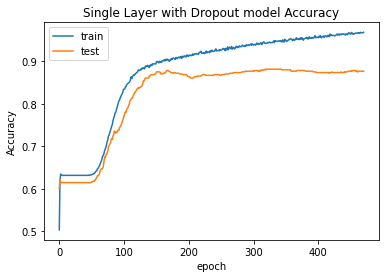

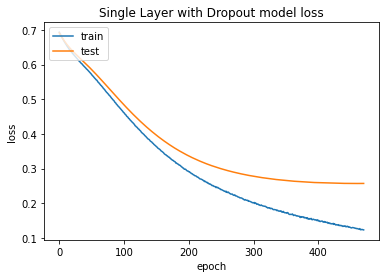

In [ ]:

#Plot the learning curve
import matplotlib.pyplot as plt
# summarize history for accuracy
plt.plot(history_singleLayer_withDropout.history['accuracy'])
plt.plot(history_singleLayer_withDropout.history['val_accuracy'])
plt.title('Single Layer with Dropout model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history_singleLayer_withDropout.history['loss'])
plt.plot(history_singleLayer_withDropout.history['val_loss'])
plt.title('Single Layer with Dropout model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

*Using a multi hidden layer Deep Learning network with dropout we are already getting 0.88 accuracy which is greater than all the ML models. However we can look at the graph above and see that our model is still overfitting. One of the major reason for this is the amount of data.*